In [1]:
import numpy as np, math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import distributions
from classes.likelihood import NormalLikelihood, PoissonLikelihood
from classes.variables import Normal, InvGamma, Exponential
from classes.sampler import MHSampler
from classes.model import Model

y = np.array([-0.12089986,  0.61515674,  0.56811393,  1.07073126,  1.23571253,
      -0.25292445,  0.87784138,  1.78100447,  0.3133824 ,  0.92270987])

SAMPLES = 10000

In [2]:
likelihood = NormalLikelihood()
parameters = [Normal(), InvGamma(1, 2)]
model = Model(parameters, likelihood)
sampler = MHSampler(y, model)
chain = sampler.sample(SAMPLES)

means = sampler.parameter_means()

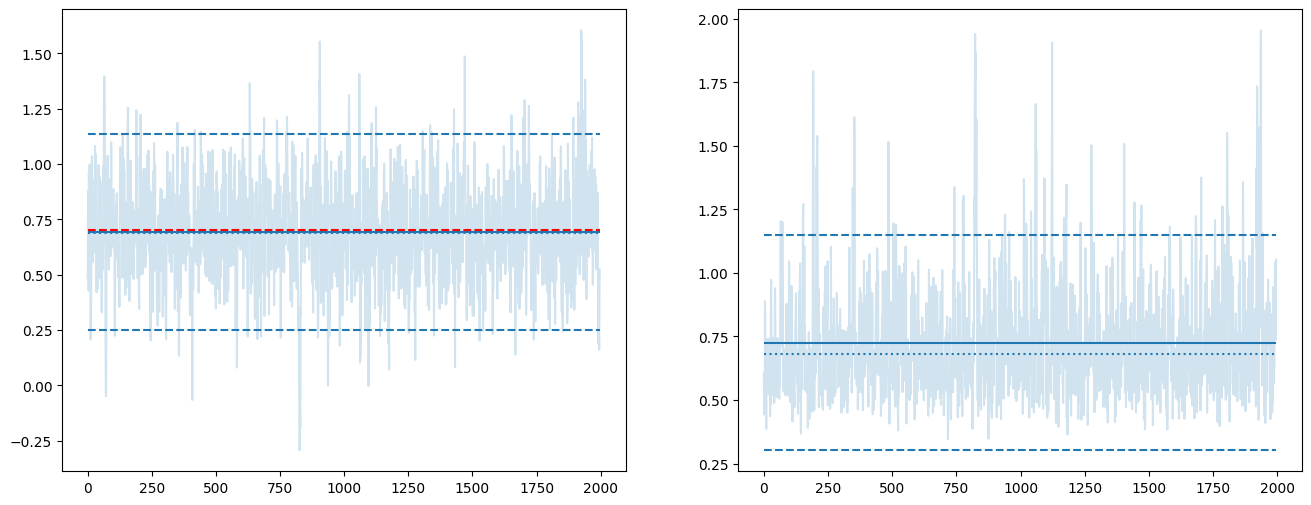

In [3]:
n_parameters = len(chain)
fig, ax = plt.subplots(nrows=1, ncols=n_parameters, figsize=(n_parameters*8, 6))

for i in range(n_parameters):
    theta_chain = chain[i]
    ax[i].plot(theta_chain, alpha=0.2)
    ax[i].hlines([np.mean(theta_chain)], xmin=0, xmax=len(theta_chain))
    ax[i].hlines([np.median(theta_chain)], xmin=0, xmax=len(theta_chain), linestyles="dotted")
    # ax[i].fill_between(x=[0, len(theta_chain)], y1=np.mean(theta_chain) + 1.96*np.std(theta_chain), y2=np.mean(theta_chain) - 1.96*np.std(theta_chain), alpha=0.2)
    ax[i].hlines(y=[np.mean(theta_chain) + 1.96*np.std(theta_chain), np.mean(theta_chain) - 1.96*np.std(theta_chain)], xmin=0, xmax=len(theta_chain), linestyles="dashed")
    if i == 0:
        ax[i].hlines([np.mean(y)], xmin=0, xmax=len(theta_chain), color="red", linestyles="dashed")
    if i == 1:
        pass
        # ax[i].hlines([np.std(y)], xmin=0, xmax=len(theta_chain), color="red", linestyles="dashed")


In [4]:
y = distributions.poisson.rvs(mu=3.8, size=100)
y = np.array([ 5,  8,  3,  1,  3,  6,  3,  4,  4,  2,  4,  5,  4,  5,  4,  2,  3,
        5,  5,  1,  9,  2,  4,  7,  4,  3,  6,  4,  1,  5,  3,  2,  3,  1,
        3,  3,  1, 11,  1,  6,  2,  4,  1,  3,  6,  5,  4,  3,  4,  3,  2,
        2,  4,  5,  7,  4,  1,  3,  2,  2,  6,  3,  4,  0,  5,  6,  3,  3,
        6,  6,  4,  1,  0,  4,  2,  1,  2,  1,  7,  1,  1,  5,  6,  4,  3,
        3,  5, 10,  3,  6,  3,  4,  6,  7,  1,  4,  6,  7,  8,  3])

In [5]:
likelihood = PoissonLikelihood()
parameters = [Exponential()]
model = Model(parameters, likelihood)

sampler = MHSampler(y, model)

chain = sampler.sample(SAMPLES)

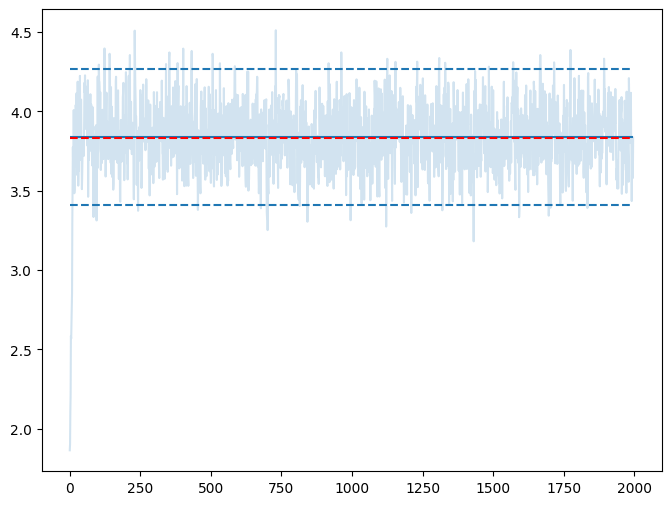

In [6]:
n_parameters = len(chain)
fig, ax = plt.subplots(nrows=1, ncols=n_parameters, figsize=(n_parameters*8, 6))

for i in range(n_parameters):
    theta_chain = chain[i]
    ax.plot(theta_chain, alpha=0.2)
    ax.hlines([np.mean(theta_chain)], xmin=0, xmax=len(theta_chain))
    # ax[i].fill_between(x=[0, len(theta_chain)], y1=np.mean(theta_chain) + 1.96*np.std(theta_chain), y2=np.mean(theta_chain) - 1.96*np.std(theta_chain), alpha=0.2)
    ax.hlines(y=[np.mean(theta_chain) + 1.96*np.std(theta_chain), np.mean(theta_chain) - 1.96*np.std(theta_chain)], xmin=0, xmax=len(theta_chain), linestyles="dashed")

    ax.hlines([np.mean(y)], xmin=0, xmax=len(theta_chain), color="red", linestyles="dashed")



In [7]:
mu1 = -1
mu2 = 1
w1 = 0.5
xmin = -3
xmax = 3
xrange = np.arange(xmin,xmax,0.01)
def f(X, w1=w1) -> np.ndarray:
    return w1*distributions.norm.pdf(X, loc=mu1, scale=1.0) + (1-w1)*distributions.norm.pdf(X, loc=mu2, scale=1.0)

In [8]:
y = np.array([-1.42064144,  0.68615248, -0.12268064, -1.56841365,  0.77278432,
       -2.9957832 , -0.80084822, -1.5276294 , -0.96945657, -0.42762472,
       0.06589666, 1.72620247, 2.53837067, 2.06008666, 0.67753624,
       2.76686856, 1.38138495, 0.92817373, 1.86015938, 1.54262541])

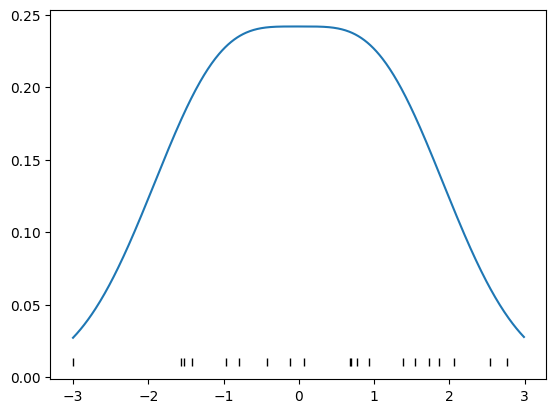

In [9]:
plt.plot(y, [0.01]*len(y), '|', color="k")
plt.plot(xrange, f(xrange))